# COMP 432 Assignment 1

In this assignment you'll be classifying emojis!

<img src="img/sample-emojis.png"/>

The assignment is very much like a lab. It is broken into many small and specific steps that build on each other. The main differences are:
1. the assignment combines multiple concepts together,
3. the assignment will be carefully graded, and
2. where <span style="color:#080;font-weight:bold">specified</span>, you must add comments to your code.

There are 5 questions: Q1 (20 marks), Q2 (20 marks), Q3 (20 marks), Q4 (10 marks), Q5 (10 marks) and one bonus question Q6 (10 bonus marks).

Rules for academic integrity:
* Like labs, students are encouraged to ask conceptual questions of TAs and of other students, and can answer each others' conceptual questions.
* Unlike labs, students are not allowed to post example code in a public forum, even if the code is wrong; code and pseudocode can only be shared with TAs when requesting help.
* Never ask for, or offer, code snippets for the assignment to your fellow students. Doing so is forbidden, and is a major violation of academic integrity, both of the person who shared the code and the person who accepted the code. Violations of academic integrity will be reported to the Dean's Office. Violators risk their academic standing.

Advice:
* *Invest in plotting.* Plotting is super important for ML and for data sciences generally. So, put in the time to learn how to make plots properly.
* *Set random_state whenever applicable.* Some steps of the assignment involve randomness, usually when calling scikit-learn functions. In order to make your assignment reproducible, you must set the *random_state* to some constant (e.g. 0) whenever applicable.
* *Save your notebook frequently.* Although Jupyter notebooks are mostly reliable, it is possible to encounter an erroneous state, where the most recent changes cannot be saved to disk by the notebook's own save functionality.

**Run the code cell below** to import the necessary packages.

In [2]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing

# Matplotlib might complain that a lot of figures are open, but suppress that warning.
plt.rcParams.update({'figure.max_open_warning': 0})

**Run the code cell below** to define some utility functions for fetching data and for processing images.

In [3]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

# def rgba_to_rgb(image):
#     """
#     Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
#     Returns the new RGB image.
#     """
#     assert image.ndim == 3, "Expected 3-dimensional array"
#     assert image.shape[2] == 4, "Expected 4 colour channels"
#     rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
#     return a*rgb + (1-a)                   # Apply alpha blending to get RGB

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q1 &mdash; Download emoji metadata and images [20 marks total]

The image data and corresponding metadata that you need for this assignment is available from [github.com/imcal/emoji-data](https://github.com/iamcal/emoji-data), where you can also find a description of the data. The specific files you'll need are only:
* *emoji.json*
* *sheets-clean/sheet_{vendor}_{size}_clean.png*

where *{vendor}* is one of *{apple, facebook, google, twitter}* and *{size}* is the pixel resolution. You'll need emojis from all four vendors, but only the small *16x16* pixel versions (to make training faster). However, do NOT download the files manually.

<div style="border-bottom: 1px solid black;"></div>

### *Q1a &mdash;  Write code to download the files [5 marks]*

Use the *download* function defined above to fetch the five files *procedurally*. 

*Hint:* When you visit a Github URL in your browser, Github normally returns an HTML file for rendering in your web browser. To ask Github for an actual raw file (instead of the web page for displaying that file) you must use special URLs. If you view a file in your web browser https://github.com/iamcal/emoji-data/{path_to_file} then you should use URL https://github.com/iamcal/emoji-data/raw/master/{path_to_file}.

In [4]:
# Your code here. Use as many lines as you need.
# Feel free to define global variables like EMOJI_SIZE=16 for later use.
EMOJI_SIZE = 16
BASE_URL = 'https://github.com/iamcal/emoji-data/raw/master/'
remote_path = 'emoji.json'
local_path = './data/emoji.json'
# Download emoji.json
download(BASE_URL+remote_path, local_path)
# Download other emojis
remote_paths = ['apple', 'facebook', 'google', 'twitter']
for path in remote_paths:
    download('https://github.com/iamcal/emoji-data/raw/master/sheets-clean/sheet_'+path+'_16_clean.png', './data/sheet_'+ path +'_16_clean.png')

<div style="border-bottom: 1px solid black;"></div>

### *Q1b &mdash;  Load and inspect the emoji metadata [5 marks]*

The emoji metadata is contained in a JSON file, which Python's **[json](https://docs.python.org/3/library/json.html)** module can easily load and parse for you.

**Write code** to load the *emoji.json* file, then display the metadata for the first emoji (index 0) so that you can see an example. It should have short name '*hash*'.

In [5]:
# Your answer here. Aim for 2-4 lines.
# Keep the metadata in a global variable that you can keep referring to.
json_list=[]


with open("./data/emoji.json",'r') as load_f:
    for line in load_f:
        json_list = json.loads(line)

        
print(json_list[12])

{'name': 'COPYRIGHT SIGN', 'unified': '00A9-FE0F', 'non_qualified': '00A9', 'docomo': 'E731', 'au': 'E558', 'softbank': 'E24E', 'google': 'FEB29', 'image': '00a9-fe0f.png', 'sheet_x': 0, 'sheet_y': 12, 'short_name': 'copyright', 'short_names': ['copyright'], 'text': None, 'texts': None, 'category': 'Symbols', 'sort_order': 132, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': False}


**Write code** to find the index of the emoji having short name *'laughing'*, then display its metadata (the *dict* object). Do not use the *sort_order* field of the emoji metadata, it is not relevant to this assignment.

In [6]:
# Your answer here. Aim for 1-5 lines. Keep the index in a global variable for later.
laughing = {}
index = -1
for i in json_list:
    index += 1
    if i['short_name'] == 'laughing':
        laughing = i
        break
print(laughing, index)

def find_index_by_name(short_name):
    index = -1
    for i in json_list:
        index += 1
        if i['short_name'] == short_name:
            return index
    

{'name': 'SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES', 'unified': '1F606', 'non_qualified': None, 'docomo': 'E72A', 'au': 'EAC5', 'softbank': None, 'google': 'FE332', 'image': '1f606.png', 'sheet_x': 30, 'sheet_y': 38, 'short_name': 'laughing', 'short_names': ['laughing', 'satisfied'], 'text': None, 'texts': [':>', ':->'], 'category': 'Smileys & Emotion', 'sort_order': 5, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': True} 1068


<div style="border-bottom: 1px solid black;"></div>

### *Q1c &mdash;  Load and inspect the emoji image data [10 marks]*

The emoji image data is contained in PNG files, which Matplotlib's **[imread](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imread.html)** function can load as a Numpy array. The image format is RGBA (*red*, *green*, *blue*, *alpha*) where *alpha* determines the opacity of each pixel.

**Write code** to load the four emoji sheet images. The list of images should be in order *{apple,facebook,google,twitter}*.

In [7]:
# Your answer here. Aim for 1-4 lines. You can define a global variable to hold the list of numpy arrays.
file_list = ['apple','facebook','google','twitter']
readed_img = []
for i in file_list:
    readed_img.append(mpl.image.imread('./data/sheet_'+i+'_16_clean.png', format='RGBA'))
    

**Write code** to plot each vendor's sheet image. Generate four separate plots, where the title of each plot should be "*vendor* (*height*, *width*, *channels*)" where *height* and *width* are the size of the sheet and *channels* is the number of colour channels. Use the *figsize* argument of Matplotlib's *figure* function to enlarge the figures. The top of your first plot should look like this:

<img src="img/example-apple-emoji-sheet.png" width=650/>


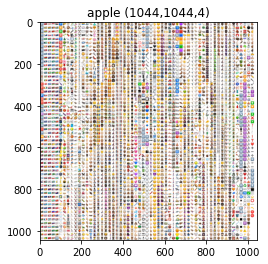

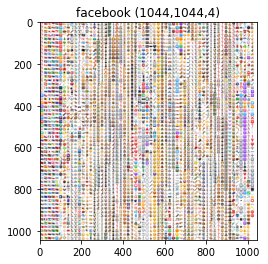

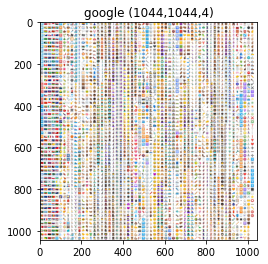

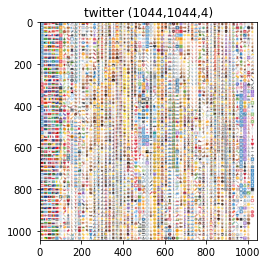

In [8]:
# Your answer here. Aim for 4-6 lines.
for i in range(4):
    plt.figure()
    plt.imshow(readed_img[i])
    width, length, depth = readed_img[i].shape
    t = "{vendor} ({a},{b},{c})".format(vendor=file_list[i], a=width, b=length, c=depth)
    plt.title(t)
    plt.show()

**Write code** to generate the same four plots as above, except use Numpy slicing to display only the first 3 rows and 8 columns of the sheet. To ensure you do not crop any emojis, take note of any "padding" between the 16x16 emojis in the sheet. Your first plot should look like this, but with the shape numbers (?) and axis ticks filled in:

<img src="img/example-apple-emoji-sheet-slice.png" width=650/>

(If you see a red question mark like <span style="color:red">?</span> for a vendor, it means they do not provide that particular emoji.)

(1044, 1044, 4)


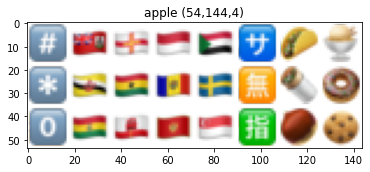

(1044, 1044, 4)


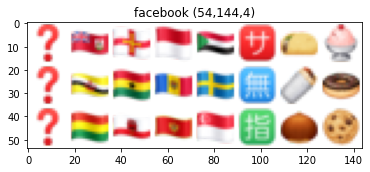

(1044, 1044, 4)


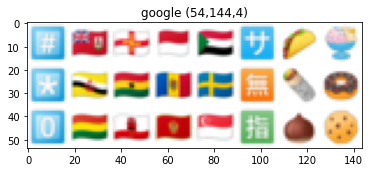

(1044, 1044, 4)


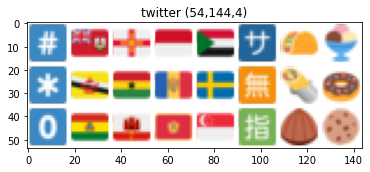

In [9]:
# Your answer here. Aim for 5-9 lines.
for i in range(4):
    print(readed_img[i].shape)
    plt.figure()
    img_to_show = readed_img[i][0:18*3,0:18*8]
    plt.imshow(img_to_show)
    width, length, depth = img_to_show.shape
    t = "{vendor} ({a},{b},{c})".format(vendor=file_list[i], a=width, b=length, c=depth)
    plt.title(t)
    plt.show()

**Implement *get_emoji_image*.** It should extract a 16x16 RGBA emoji image by its style index (0=*apple*, 1=*facebook*, 2=*google*, 3=*twitter*) and emoji index (as they appear in *emoji.json*). Internally, your function may refer to any global variables you have already defined (metadata, images, size, padding). Use the *sheet_x* and *sheet_y* fields of the metadata. Use slicing and avoid for-loops. <span style="color:#080;font-weight:bold">Briefly comment each line of your code.</span>

(16, 16, 4)


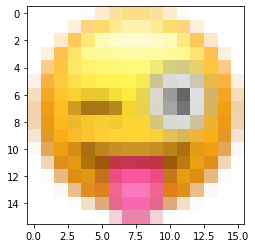

In [111]:
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    # Your implementation here. Aim for 5-8 lines (not including comments).
    img = readed_img[style_index]
    json_info = json_list[emoji_index]
    x_index = json_info["sheet_x"]
    y_index = json_info["sheet_y"]
    column = x_index * 18
    row = y_index * 18
    return  img[row+1:row+17,column+1:column+17]

image = get_emoji_image(0,1090)
plt.imshow(image)

**Implment *plot_emoji_styles*.** Implement the *plot_emoji_styles* function below, using your *get_emoji_image* function as a subroutine. Use *figsize* to control the size of your figure, use Matplotlib's *subplot* and *title* functions along with its **[suptitle](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.suptitle.html)** to create titles that show the emoji index, the emoji short name, and the vendor title above each style, as shown below:

<img src="img/example-plot-emoji-styles.png" width=600/>

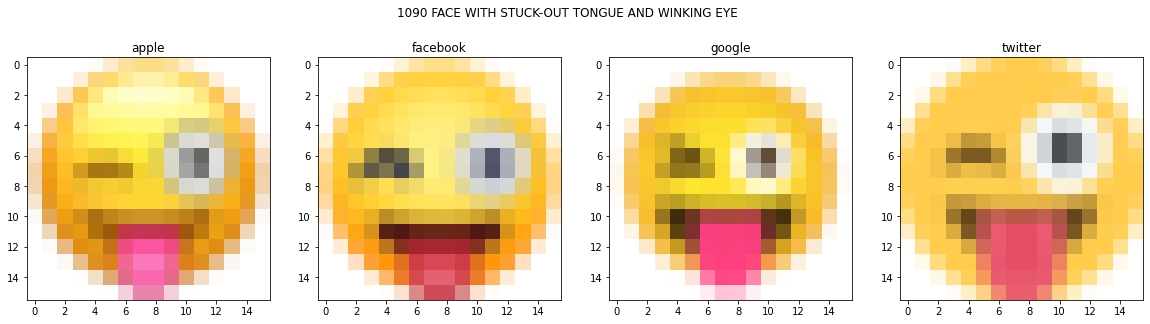

In [109]:
def plot_emoji_styles(emoji_index):
    """Plots all four vendor styles of the given emoji."""
    # Your implementation here. Aim for 6-8 lines.
    json_info = json_list[emoji_index]
    plt.figure(figsize=(20,5))
    plt.suptitle("{index} {name}".format(index=emoji_index, name=json_info['name']))
    
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(file_list[i])
        plt.imshow(get_emoji_image(i,emoji_index))
        
    plt.show()

plot_emoji_styles(1090)
        

**Run your *plot_emoji_styles*** function to plot the '*laughing*' emoji from **Q1b**. Also plot two other emojis of your choosing. (Except poop. You're not allowed to plot the poop emoji. Don't you dare. No, no wait stop, have some self-respect, don't do it, noooo!)

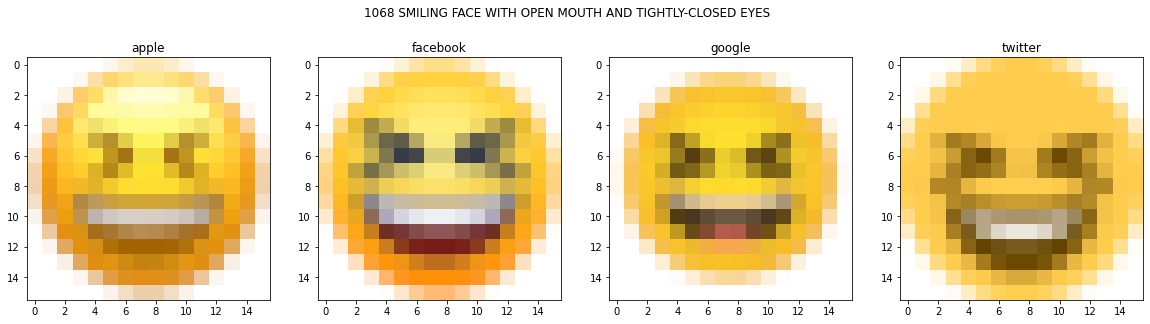

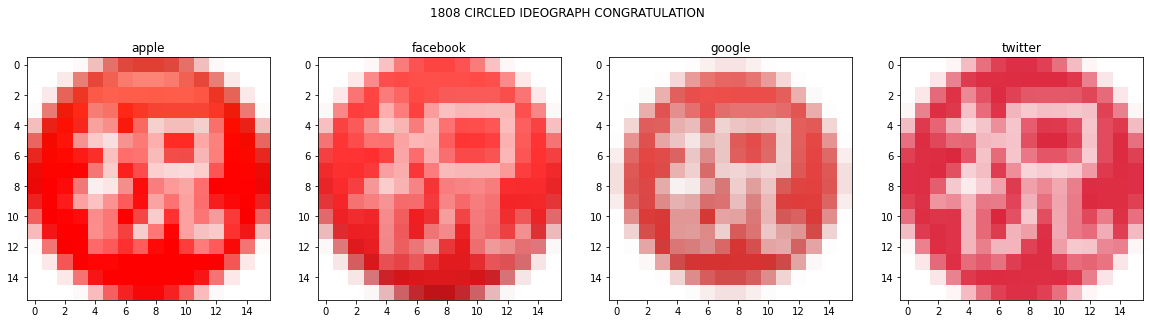

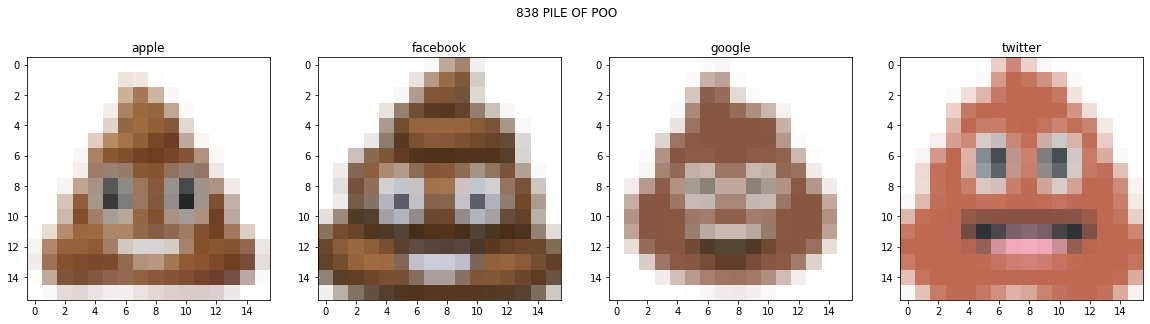

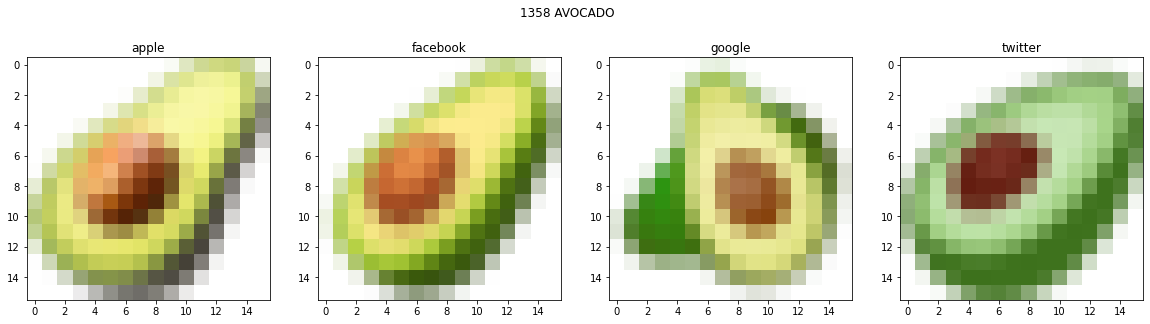

In [110]:
# Your code here. Aim for 2-3 lines.
plot_emoji_styles(1068)
plot_emoji_styles(1808)
plot_emoji_styles(find_index_by_name('hankey'))
plot_emoji_styles(find_index_by_name('avocado'))

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q2 &mdash; Build an emoji data set for machine learning [20 marks total]

This question is about converting your list of four raw image sheets into a data set suitable for training with scikit-learn. 

<div style="border-bottom: 1px solid black;"></div>

### *Q2a &mdash;  Build a set of inputs $\boldsymbol{X}$ from the sheet images [5 marks]*

**Write code** to build a Numpy array of inputs $\boldsymbol{X}$ having dtype *float32* and shape $(N,D)$ where $N$ is the total number of emoji images (number of emojis $\times$ number of vendors) and $D$ is the total number of pixels per emoji (height $\times$ width $\times$ channels). Each image should be converted from RGBA (4 channels) to RGB (3 channels) using the *rgba_to_rgb* function defined at the top of this lab. The first rows of $\boldsymbol{X}$ should all be apple emojis, followed by all facebook emojis, then all google emojis, and finally the last rows should be all twitter emojis. <span style="color:#080;font-weight:bold">Briefly comment each non-trivial line of your code.</span>

In [113]:
# Your answer here. Aim for 6-10 lines.
N = len(json_list) #1810
X = np.empty([N*4, 16*16*3],dtype='uint8')
for emoji_idx in range(N):
    for style_idx in range(4):
        cur_emoji = get_emoji_image(style_idx, emoji_idx)
        cur_emoji = rgba_to_rgb(cur_emoji)
        X[emoji_idx + N * style_idx] = cur_emoji.ravel()

<div style="border-bottom: 1px solid black;"></div>

### *Q2b &mdash;  Build a set of targets $\boldsymbol{y}$ from the metadata [5 marks]*

Here you'll enumerate the distinct emoji categories, and then build a vector of integer targets $\boldsymbol{y}$.

**Write code** to get a list of distinct emoji categories, using the *category* field from the metadata; ensure that the list of categories is displayed when the code cell below is executed.

In [114]:
# Your answere here. Aim for 2-4 lines.
category_enumerate = []
for emoji in json_list:
    category_enumerate.append(emoji['category'])
category_enumerate = list(set(category_enumerate))
category_dict = {}
for i in range(len(category_enumerate)):
    category_dict[category_enumerate[i]] = i 
print(category_dict)

{'Travel & Places': 0, 'Symbols': 1, 'Animals & Nature': 2, 'Flags': 3, 'Food & Drink': 4, 'Activities': 5, 'People & Body': 6, 'Objects': 7, 'Smileys & Emotion': 8, 'Skin Tones': 9}


**Write code** to build a Numpy array of inputs $\boldsymbol{y}$ having dtype *int32* and where $y_i \in \{0, \ldots, M-1\}$ with $M$ being the number of distinct emoji categories. The order of items in $\boldsymbol{y}$ should match those of $\boldsymbol{X}$ from **Q2a**. You may use any approach you like, but potentially useful functions include the *list* object's **[index](https://docs.python.org/3/tutorial/datastructures.html)** function and Numpy's **[np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)** function. <span style="color:#080;font-weight:bold">Briefly comment each non-trivial line of your code.</span>

In [115]:
# Your answer here. Aim for 3-5 lines.
y = np.empty([N*4],dtype='float32')
for i in range(N):
    cur_dict = json_list[i]
    for j in range(4):
        y[i + N*j ] = category_dict[cur_dict['category']]

**Write code** to demonstrate that, for each $i$ that corresponds to a '*laughing*' emoji (for apple, facebook, google, twitter), its $y_i$ label is set to be the index of the "Smileys & Emotion" category.

In [116]:
# Your answer here. Aim for 1-3 lines.
idx = find_index_by_name('laughing')
print(y[idx])
print(y[idx + N * 1])
print(y[idx + N * 2])
print(y[idx + N * 3])

8.0
8.0
8.0
8.0


<div style="border-bottom: 1px solid black;"></div>

### *Q2c &mdash;  Split and preprocess the data [10 marks]*

**Write code** to randomly split $(\boldsymbol{X}, \boldsymbol{y})$ into three parts, with no overlap:
1. a *training* set $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$, which you will use to directly train classifiers
2. a *validation* set $(\boldsymbol{X}_\text{val}, \boldsymbol{y}_\text{val})$, which you will use to estimate the best value for a hyperparameter
3. a *test* set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$, which you will use to evaluate final performance of the 'best' hyperparameters

The training data should comprise 60% of the full data set. The validation and testing data should each comprise 20% of the original data. Use the **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** function and remember to set *random_state* so that your splits (and thereby your conclusions) are reproducible for TAs.

In [117]:
# Your code here. Aim for 2-3 lines.
X_trn, X_test, y_trn, y_test = sklearn.model_selection.train_test_split(X,y, train_size=0.6, test_size=0.4, random_state=1)
X_val,X_tst,y_val,y_tst = sklearn.model_selection.train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, random_state=1)

**Write code** to normalize the features of $\boldsymbol{X}_\text{trn}$, $\boldsymbol{X}_\text{val}$, and $\boldsymbol{X}_\text{tst}$, using scikit-learn's **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**. Be careful which subset of the data you use for estimating the *StandardScaler* object's *scale_* and *mean_* attributes.

In [118]:
# Your answer here. Aim for 4-5 lines.
scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_trn = scaler.transform(X_trn)
X_tst = scaler.transform(X_tst)
X_val = scaler.transform(X_val)

**Plot a scaled and unscaled emoji side-by-side.** Choose a row from $\boldsymbol{X}_\text{trn}$ and show how it appears as an RGB image with and without scaling. If Matplotlib complains that values are not in range [0,1], consider using **[np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)**. Your plot should look like the example below, although the choice of emoji could differ.

<img src="img/example-scaled-emoji.png" width=250/>

*Hint:* You do not need to know which row in $\boldsymbol{X}_\text{trn}$ corresponds to which row in $\boldsymbol{X}$. Instead you can "undo" the scaling on whatever row you pick, using one of the methods provided by *StandardScaler*.

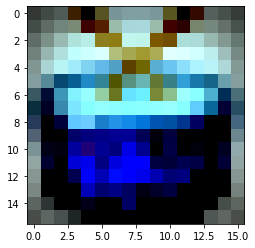

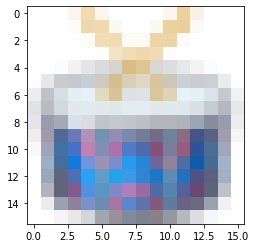

In [119]:
# Your answer here. Aim for 9-12 lines.
cur_emoji = X_trn[18].reshape(16,16,3)
plt.imshow(np.clip(cur_emoji,0,1))
plt.show()
plt.imshow(scaler.inverse_transform(X_trn[18]).reshape(16,16,3).astype(int))


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q3 &mdash; Train classifiers and identify good hyperparameters [20 marks total]

This question has several goals:
1. to help you visualize how hyperparameters affect training/validation/test performance.
2. to give you a sense for how long certain classifiers take to train or to make predictions.
3. to force you to try two useful Python features: (a) passing types as arguments, and (b) argument forwarding.

(However, please take the hyperparameter search lab as a better example of how to use scikit-learn for hyperparameter search; this assignment is focused on making things easy to plot and visualize, not on automating the search itself.)

<div style="border-bottom: 1px solid black;"></div>

### *Q3a &mdash;  Write a function to trains multiple estimators [5 marks]*

Throughout **Q3**, you will be training multiple estimators, each with a different hyperparameter setting.

**Implement the *train_estimators* utility function.** The idea of this function is to make it easy to train multiple versions of an estimator where a single hyperparameter (specified by *param_name*) takes on a different value (specified by *param_vals*) for each estimator. See the docstring below.

*Hint:* For details on how Python argument forwarding works (`**kwargs`), see [this Stack Overflow answer](https://stackoverflow.com/a/36908).

In [120]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(X, y, DecisionTreeClassifier, 'max_depth', [1, 5, 10],
                            splitter='random', random_state=0)
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    # Your implementation here. Aim for 5-10 lines.
    estimators= []
    for i in param_vals:
        kwargs[param_name] = i
        clf = estimator_type(**kwargs).fit(X,y)
        print("Training",clf)
        estimators.append(clf)
    return estimators

**Run the code cell below** to test your implementation of *train_estimators*. (Replace *X_trn* and *y_trn* with whatever you called your training set variables.)

In [121]:
tree_estimators = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10], splitter='random', random_state=0)
tree_estimators

Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')


[DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')]

<div style="border-bottom: 1px solid black;"></div>

### *Q3b &mdash;  Train multiples models, plot their accuracies, and identify good parameters [15 marks]*

**Implement the *score_estimators* utility function.** This will be handy for scoring a list of estimators on a particular data set, such as $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$. Use the estimator's own *score* method.

In [122]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    # Your implementation here. Aim for 1-4 lines.
    scores = []
    for clf in estimators:
        scores.append(clf.score(X,y))
    return scores

**Run the code cell below** to test your implementation. It should print three scores per dataset. Each score is a measure of classification accuracy. (Replace *X_trn* and *y_trn* etc with your data set variables.)

In [123]:
print("train:   ", score_estimators(X_trn, y_trn, tree_estimators))
print("validate:", score_estimators(X_val, y_val, tree_estimators))
print("test:    ", score_estimators(X_tst, y_tst, tree_estimators))

train:    [0.302255985267035, 0.5283149171270718, 0.7808471454880295]
validate: [0.2948895027624309, 0.5138121546961326, 0.5580110497237569]
test:     [0.31284530386740333, 0.5234806629834254, 0.5649171270718232]


**Run the code cell below** to see a demonstration of the `%%time` feature of Jupyter (see [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)). Note that `%%time` only works if it is the first line in a code cell, before comments.

In [124]:
%%time
for i in range(1000000):  # Burn some CPU cycles in a
    pass                  # loop that does nothing

CPU times: user 32.5 ms, sys: 1.29 ms, total: 33.8 ms
Wall time: 32.8 ms


**Train multiple *DecisionTreeClassifier*s** on the training set, such that *train_estimators* produces the following output:

    Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')...

In [125]:
%%time
# Your answer here. Aim for 1-2 lines.
dtEstimators = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier, 'max_depth', [1,5,10,20,50,100], random_state=0, splitter='random')

Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')
Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')
CPU times: user 1.57 s, sys: 10.3 ms, total: 1.58 s
Wall time: 1.58 s


**Implement *plot_estimator_scores*** to visualize the effect of the parameter on accuracy. When applied to the decision tree estimators you trained in the previous cell, the plot should look like below, including legend, colours, marks, and x-axis ticks, but your precise scores may differ depending on how you decided to split the data.

<img src="img/example-decisiontree-scores-plot.png" width=375/>

*Hint:* You can use your *score_estimators* implementation, but do not do any training.

*Hint:* For the title, you can get the object's type from its `__class__` attribute, and you can get the name of its type from the type's `__name__` attribute. Use the first object in *estimators* to determine the name of the classifier type that you're plotting.

*Hint:* If your $x$-axis points are not evenly spaced, you can plot each series using any evenly-spaced $x$ values (e.g. via *np.arange*) and then override the x-axis tick labels with whatever you want. See the *labels* argument of Matplotlib's **[xticks](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)** function.

In [126]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    # Your implementation here. Use as many lines as you need.
    x = param_vals
    labels = param_name

    y1=score_estimators(X_trn, y_trn, estimators)
    y2=score_estimators(X_val, y_val, estimators)
    y3=score_estimators(X_tst, y_tst, estimators)
    plt.text(3.5, 0.60, 'train = ' + str(round(np.max(y1), 3)), {'color': 'g', 'fontsize': 10})
    plt.text(3.5, 0.55, 'validate = ' + str(round(np.max(y2), 3)), {'color': 'r', 'fontsize': 10})
    plt.text(3.5, 0.50, 'test = ' + str(round(np.max(y3), 3)), {'color': 'k', 'fontsize': 10})
    
    best_validation_index = np.argmax(y2)
    plt.plot(best_validation_index, y2[best_validation_index], 'r', marker="x", markersize=12, mew=2)
    
    plt.plot(x, y1,color='g',marker = 'o')
    plt.plot(x, y2,color='r',marker = 'o')
    plt.plot(x, y3,color='black',marker = 'o')
    
    plt.xticks(np.arange(0, 6, step=1))
    plt.subplots_adjust(bottom=0.15)
    plt.legend(labels = ['train','validation','test'])
    plt.show()
    


**Plot the *DecisionTreeClassifier* scores** by calling your *plot_estimator_scores* function. Your plot should look like the example plot.

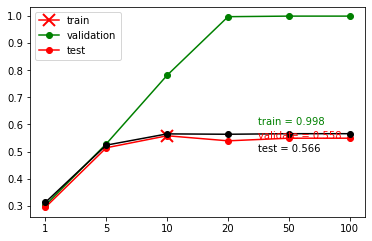

CPU times: user 170 ms, sys: 16.6 ms, total: 186 ms
Wall time: 185 ms


In [127]:
%%time
# Your code here. Aim for 1 line.
plot_estimator_scores(dtEstimators,'max_depth', ['1','5','10','20','50','100'])

**Train multiple *RandomForestClassifiers*** such that *train_estimators* produces the following output:

    Training RandomForestClassifier(max_depth=1, random_state=0)...
    Training RandomForestClassifier(max_depth=5, random_state=0)...
    Training RandomForestClassifier(max_depth=10, random_state=0)...
    Training RandomForestClassifier(max_depth=20, random_state=0)...
    Training RandomForestClassifier(max_depth=50, random_state=0)...
    Training RandomForestClassifier(max_depth=100, random_state=0)...

In [128]:
%%time
# Your code here. Aim for 1-2 lines.
from sklearn.ensemble import RandomForestClassifier
max_dept=[1,5,10,20,50,100]
RandomForestClassifier = train_estimators(X_trn,y_trn, RandomForestClassifier,'max_depth', max_dept, random_state=0)
RandomForestClassifier

Training RandomForestClassifier(max_depth=1, random_state=0)
Training RandomForestClassifier(max_depth=5, random_state=0)
Training RandomForestClassifier(max_depth=10, random_state=0)
Training RandomForestClassifier(max_depth=20, random_state=0)
Training RandomForestClassifier(max_depth=50, random_state=0)
Training RandomForestClassifier(max_depth=100, random_state=0)
CPU times: user 16.1 s, sys: 35.9 ms, total: 16.1 s
Wall time: 16.1 s


[RandomForestClassifier(max_depth=1, random_state=0),
 RandomForestClassifier(max_depth=5, random_state=0),
 RandomForestClassifier(max_depth=10, random_state=0),
 RandomForestClassifier(max_depth=20, random_state=0),
 RandomForestClassifier(max_depth=50, random_state=0),
 RandomForestClassifier(max_depth=100, random_state=0)]

**Plot the *RandomForestClassifier* scores**, again by calling your *plot_estimator_scores* function.

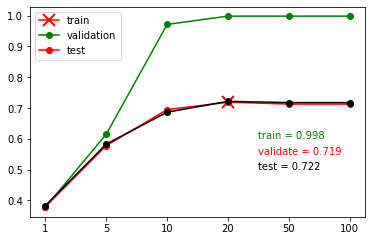

CPU times: user 977 ms, sys: 14.9 ms, total: 992 ms
Wall time: 995 ms


In [129]:
%%time
# Your code here. Aim for 1 line.
plot_estimator_scores(RandomForestClassifier, 'max_depth', ['1','5','10','20','50','100'])

**Train multiple *LogisticRegression* classifiers** such that *train_estimators* produces the following output:

    Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
    Training LogisticRegression(max_iter=10000, random_state=0)...
    
The omission of *C* when the final estimator was printed means it was trained with its default value, which is *C*=1. You can try it yourself:
```python
>>> LogisticRegression(C=1.01)
LogisticRegression(C=1.01)

>>> LogisticRegression(C=1.0)
LogisticRegression()
```

In [130]:
%%time
# Your code here. Aim for 1-2 lines
from sklearn.linear_model import LogisticRegression
c=[0.00001,0.0001,0.001,0.01,0.1,1]
LogisticRegression = train_estimators(X_trn,y_trn, LogisticRegression,'C', c, random_state=0,max_iter=10000)
LogisticRegression

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)
Training LogisticRegression(C=1, max_iter=10000, random_state=0)
CPU times: user 1min 29s, sys: 699 ms, total: 1min 30s
Wall time: 15.3 s


[LogisticRegression(C=1e-05, max_iter=10000, random_state=0),
 LogisticRegression(C=0.0001, max_iter=10000, random_state=0),
 LogisticRegression(C=0.001, max_iter=10000, random_state=0),
 LogisticRegression(C=0.01, max_iter=10000, random_state=0),
 LogisticRegression(C=0.1, max_iter=10000, random_state=0),
 LogisticRegression(C=1, max_iter=10000, random_state=0)]

**Plot the *LogisticRegression* scores**, again by calling your *plot_estimator_scores* function.

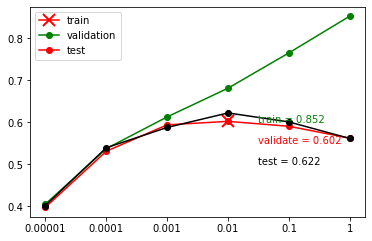

CPU times: user 904 ms, sys: 12.5 ms, total: 916 ms
Wall time: 156 ms


In [131]:
%%time
# Your code here. Aim for 1 line.
plot_estimator_scores(LogisticRegression, 'C', ['0.00001','0.0001','0.001','0.01','0.1','1'])

**Train multiple SVM classifiers (*SVC*)** such that *train_estimators* produces the following output:

    Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0)...

In [132]:
%%time
from sklearn.svm import SVC
# Your code here. Aim for 1-2 lines.
c = [0.01,0.1,1,10,100,1000]
SVCs = train_estimators(X_trn,y_trn,SVC,'C', c, gamma=0.001, max_iter=10000, random_state=0)

Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)
Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)
Training SVC(C=1, gamma=0.001, max_iter=10000, random_state=0)
Training SVC(C=10, gamma=0.001, max_iter=10000, random_state=0)
Training SVC(C=100, gamma=0.001, max_iter=10000, random_state=0)
Training SVC(C=1000, gamma=0.001, max_iter=10000, random_state=0)
CPU times: user 1min 41s, sys: 380 ms, total: 1min 41s
Wall time: 1min 42s


**Plot the *SVM* scores**, again by calling your *plot_estimator_scores* function. Predictions may take several minutes to compute.

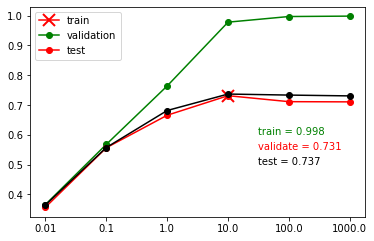

CPU times: user 2min 17s, sys: 518 ms, total: 2min 18s
Wall time: 2min 18s


In [133]:
%%time
# Your code here. Aim for 1 line.
plot_estimator_scores(SVCs, 'C', ['0.01','0.1','1.0','10.0','100.0','1000.0'])

**Question.** Do your plots support the claim that "validation set performance" is a good estimate of "test set performance" overall? YES/NO then explain below.

**Question.** Which of your classifiers had the highest test-set performance for its "best" configuration (i.e., for the configuration with highest validation-set performance)? Name the classifier and best hyperparameter setting (*max_depth* or *C*).

**Question.** Which of your classifiers had the *least over-fitting*, if we measured overfitting as the absolute difference between training-set and testing-set performance? Name the classifier and hyperparameter setting (*max_depth* or *C*).

**Question.** Which if your classifiers was slowest to train? Name the classifier.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q4 &mdash; Visualizing mistakes [10 marks total]

The goal here is to visualize classification errors, by confusion matrix and by inspecting typical mistakes.

<div style="border-bottom: 1px solid black;"></div>

### *Q4a &mdash;  Plot a confusion matrix for the best estimators [5 marks]*

**Write code** to plot a confusion matrix for each of the 'best' estimators in **Q3** when applied to test set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$. Here, 'best' means best validation score. All estimators are already trained, so you can simply pull out the one best of each type {tree, forest, logistic, svm}. Use **[plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)**. Your first plot should look like as below, though the numbers may differ.

<img src="img/example-decisiontree-confusion-matrix.png" width="350"/>

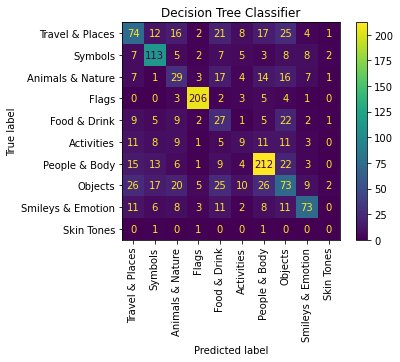

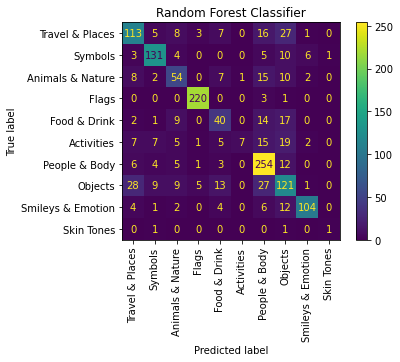

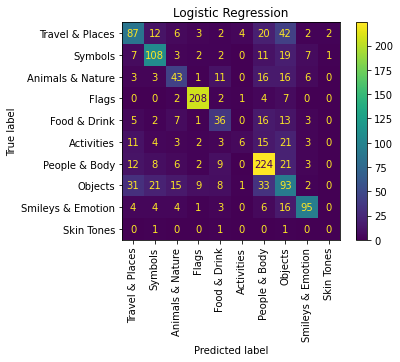

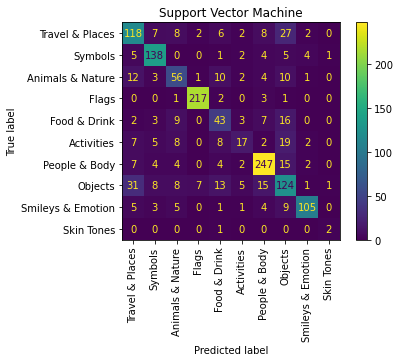

In [135]:
# Your answer here. Aim for 7-12 lines.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtEstimators[3], X_tst, y_tst,display_labels=category_dict.keys(),xticks_rotation='vertical')
plt.title('Decision Tree Classifier')
plt.show()
plot_confusion_matrix(RandomForestClassifier[3], X_tst, y_tst,display_labels=category_dict.keys(),xticks_rotation='vertical')
plt.title('Random Forest Classifier')
plt.show()
plot_confusion_matrix(LogisticRegression[3], X_tst, y_tst,display_labels=category_dict.keys(),xticks_rotation='vertical')
plt.title('Logistic Regression')
plt.show()
plot_confusion_matrix(SVCs[3], X_tst, y_tst,display_labels=category_dict.keys(),xticks_rotation='vertical')
plt.title('Support Vector Machine')
plt.show()

**Question.** What classifier is best at distinguishing between the *Flags* class and the *Objects* class, overall? Name the classifier and justify your choice.

<div style="border-bottom: 1px solid black;"></div>

### *Q4b &mdash;  Identify specific misclassified examples [5 marks]*

In this question, us the "best performing" classifier that you named at the end of **Q4a**.

**Write code** to identify all "*Objects* misclassified as *Flags*" from the test-set and then plot them as images. (The phrase "*A* misclassified as *B*" means the prediction was *B* but the true class was *A*.) Your code for identifying the misclassified examples should be vectorized, for example using functions like *np.logical_and* and/or *np.nonzero*. (Remember you might need to "undo" the feature normalization like in **Q2c**).

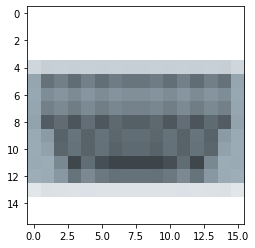

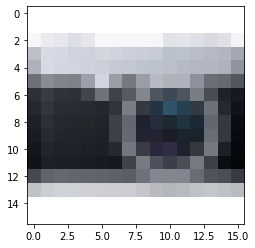

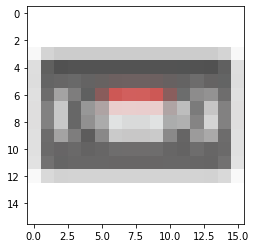

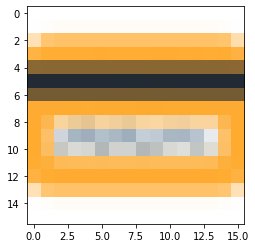

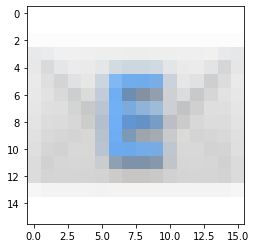

In [138]:
# Your answer here. Aim for 7-12 lines.
preds = RandomForestClassifier[3].predict(X_tst)
pred_flags = np.logical_not(preds != list(category_dict).index('Flags'))
true_objects =  np.logical_not(y_tst != list(category_dict).index('Objects'))
misclf_index = np.nonzero(np.logical_and(pred_flags, true_objects))[0]
origin_X_tst = scaler.inverse_transform(X_tst, copy=True)
for i in misclf_index:
    plt.figure()
    plt.imshow(origin_X_tst[i].reshape(16,16,3).astype(int))

**Question.** After seeing the failure cases above, can you guess why the estimator is confusing them with *Flags*? Explain in 1-2 sentences.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q5 &mdash; Visualizing feature importances [10 marks total]

The goal here is to visualize sensitivity to specific input features.

<div style="border-bottom: 1px solid black;"></div>

### *Q5a &mdash;  Visualize the feature importances of a RandomForestClassifier [5 marks]*

**Implement *plot_random_forest_importances*** below. This function should plot the *feature_importances_* attribute of a *RandomForestClassifier* (see scikit-learn docs). For the random forests you trained, there are $16 \times 16 \times 3$ features, so to make visualization easy the feature importances should be organized into three separate side-by-side heatmaps: one for each RGB colour channel. When plotting a heatmap, use *cmap*='cool' to choose the colour map. For example, plotting the feature importances of a random forest with *max_depth*=1 should look something like this:

<img src="img/example-random-forest-feature-importances.png" width="350"/>

In [175]:
def plot_random_forest_importances(estimator):
    """
    Plots the feature importances of the given RandomForestClassifier,
    arranged as three separate 16x16 heatmaps for (red, green, blue).
    """
    important_list = estimator.feature_importances_.reshape(16,16,3)
    r = important_list[:,:,0]
    g = important_list[:,:,1]
    b = important_list[:,:,2]
    plt.imshow(r,cmap='cool',interpolation='nearest')
    plt.show()
    plt.imshow(g,cmap = 'cool',interpolation='nearest')
    plt.show()
    plt.imshow(b,cmap = 'cool',interpolation='nearest')
    plt.show()
    # Your implementation here. Aim for 7-10 lines.


**Check your code** by calling your function to plot the feature importances of first *RandomForestClassifier* that you trained (with *max_depth*=1).

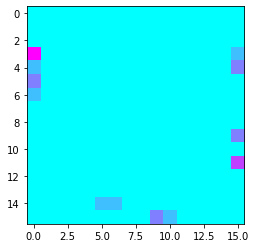

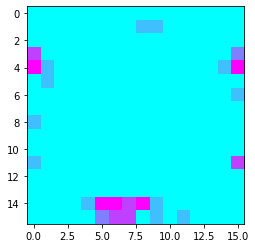

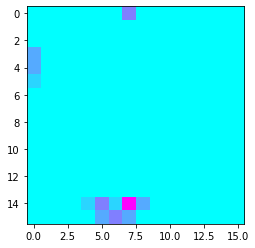

In [177]:
# Your code here (1 line)
plot_random_forest_importances(RandomForestClassifier[0])

**Plot the feature importances** of your 'best' *RandomForestClassifier* instance. The patterns should be more complex.

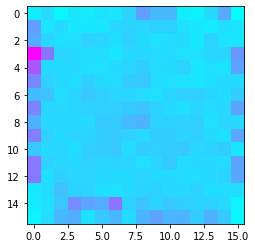

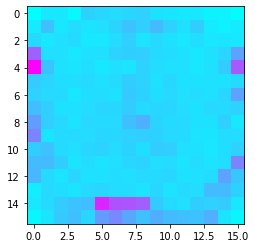

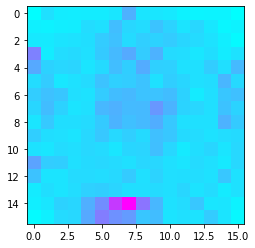

In [178]:
# Your code here (1 line)
plot_random_forest_importances(RandomForestClassifier[3])

**Question.** Why do you think the features near the edge of the image so 'important'? Explain in 1-2 sentences.

<div style="border-bottom: 1px solid black;"></div>

### *Q5b &mdash;  Visualize the feature weights of LogisticRegression [5 marks]*

This question is essentially the same as **Q5a** except you will extract the per-class weights of a *LogisticRegression* estimator that was trained on emoji images.

**Implement *plot_logistic_weights*** so that for each of the 10 categories of emoji it plots three side-by-side images.  Use the *coef_* attribute of *LogisticRegression* to extract the $16 \times 16 \times 3$ weights for each category, and then generate a separate heatmap for each RGB channel. Since we want to see clearly which weights are positive or negative, use *cmap*='bwr' when plotting each heatmap. Use *suptitle* to label each group of heatmaps with its category label. Your function should generate $10 \times 3$ heatmaps total. Below are examples of 2 of the 10 possible rows:

<img src="img/example-logistic-weights-regularized-animals.png" width="325"/>
<img src="img/example-logistic-weights-regularized-smileys.png" width="325"/>

*Hint:* Note that the $i^\text{th}$ set of weights may not match the order of categories. Use the *classes_* attribute of *LogisticRegression* to recover the category index.

In [215]:
def plot_logistic_weights(estimator):
    """
    Plots heatmaps showing the weights of the LogisticRegression estimator,
    with a separate plot for each class and for each colour channel.
    """
    assert isinstance(estimator, sklearn.linear_model.LogisticRegression)
    # Your implementation here here. Aim for 9-12 lines.
    for d in range(10):
        plt.figure()
        plt.title(list (category_dict.keys()) [list (category_dict.values()).index (d)])
        rgb=estimator.coef_[d].reshape(16,16,3)
        r=[[0]*16 for _ in range(16)]
        g=[[0]*16 for _ in range(16)]
        b=[[0]*16 for _ in range(16)]
        for i in range(16):
            for j in range(16):
                r[i][j]=rgb[i][j][0]
                g[i][j]=rgb[i][j][1]
                b[i][j]=rgb[i][j][2]
        plt.subplot(1, 3, 1)
        plt.imshow(r, cmap='bwr', interpolation='nearest')
        plt.subplot(1, 3, 2)
        plt.imshow(g, cmap='bwr', interpolation='nearest')
        plt.subplot(1, 3, 3)
        plt.imshow(b, cmap='bwr', interpolation='nearest')
        plt.show()

**Check your code** by calling your function to plot the weights of the *LogisticRegression* classifier having *strongest* regularization (the one with *C*=1e-5).

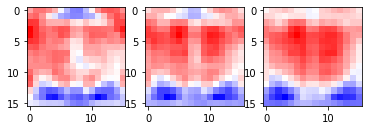

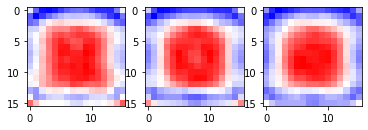

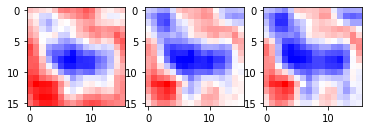

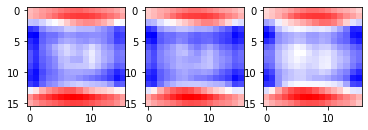

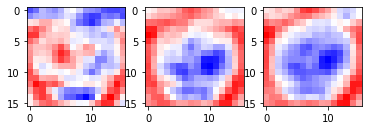

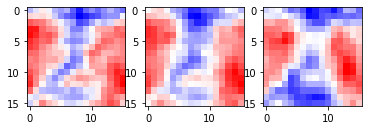

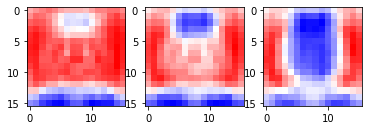

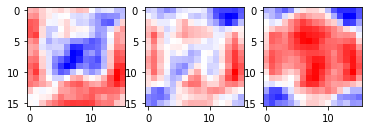

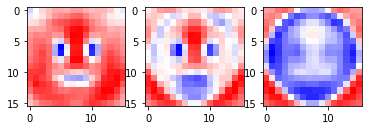

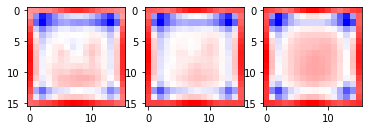

(10, 768)

In [213]:
# Your code here (1 line)
plot_logistic_weights(LogisticRegression[0])

**Plot the weights** of your 'best' *LogisticRegression* instance.

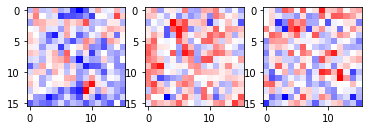

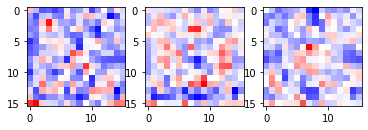

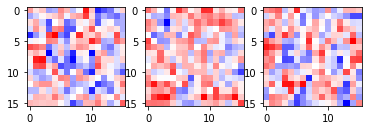

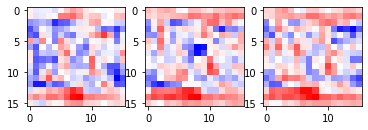

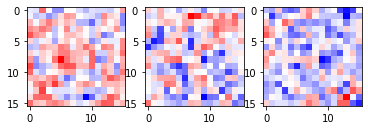

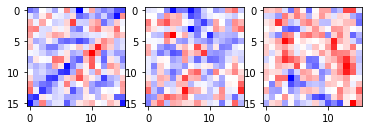

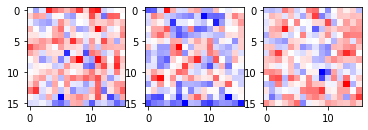

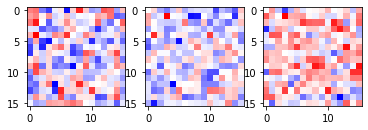

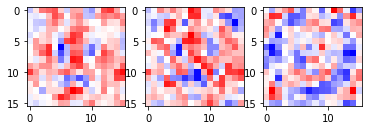

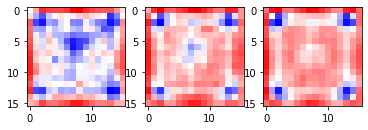

In [216]:
# Your code here (1 line)
plot_logistic_weights(LogisticRegression[3])

**Question.** Was your best-performing *LogisiticRegression* classifier also the most interpretable? YES/NO then explain in 2-3 sentences.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q6 &mdash; Generating Python code for a tree  [10 marks BONUS]

The goal here is to develop a deeper understanding of scikit-learn's decision tree and data structure, by generating an equivalent Python program, compiling it, and executing it. Most of the question is just learning how things work, and the part you have to do is at the very end.

**Run the code cell below**, replacing *X_trn* and *y_trn* with whatever you named your training set variables.

In [ ]:
# Train a tiny tree on a tiny training set of only 4 instances
X_tiny = X_trn[:4]
y_tiny = y_trn[:4]
tiny_tree = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_tiny, y_tiny)

# Plot the tree and print the true and predicted labels
sklearn.tree.plot_tree(tiny_tree)
print("true:", y_tiny)
print("pred:", tiny_tree.predict(X_tiny))

The above is meant as a simple easy-to-understand tree, much simpler than the real ones you trained in **Q3**.

**Run the code cell below** to see a function that traverses a *DecisionTreeClassifier*'s internal tree data structure and prints a message each time it encounters a split node or a leaf node. Notice how it corresponds to the plotted tree above.

In [ ]:
def print_tree(tree):
    """Prints the structure of a DecisionTreeClassifier."""
    assert isinstance(tree, sklearn.tree.DecisionTreeClassifier)

    # Shorthand for some tree attributes
    left = tree.tree_.children_left     # left[i]: index of left  node when i is a split
    right = tree.tree_.children_right   # right[i]: index of right node when i is a split
    feature = tree.tree_.feature        # feature[i]: index feature to test when i is a split
    threshold = tree.tree_.threshold    # threshold[i]: threshold to use when i is a split
    votes = tree.tree_.value            # votes[i,j]: number of training examples to reach
                                        #             node i while having class index j

    def visit_subtree(i, depth):
        indent = "  "*depth
        if left[i] != right[i]:
            print("%snode %d: split on x[%d] <= %f" % (indent, i, feature[i], threshold[i]))
            visit_subtree(left[i],  depth+1)
            visit_subtree(right[i], depth+1)
        else:
            label = tree.classes_[np.argmax(votes[i])]
            print("%snode %d: leaf label %d" % (indent, i, label))
            
    visit_subtree(0, 0)
    
print_tree(tiny_tree)

**Call *print_tree* on your best *DecisionTreeClassifier*** from **Q3**. (The output will be very long.)

In [ ]:
# Your code here (1 line)

**Implement the *tree_to_code* function below.** The idea is to transform a *DecisionTreeClassifier* instance into equivalent Python code, where the code is built up as a string. You may copy whatever code you want from *print_tree* as a starting point, but you must <span style="color:#080;font-weight:bold">add a comment for each new line of code</span>.

For example, if you called it with the *tiny_tree* from earlier, it might produce a string like below (although not necessarily an identical program, depending on the training set for *tiny_tree*).

```
>>> print(tree_to_code(tiny_tree))
def predict(x):
  if x[395] <= -0.642489:
    if x[174] <= -0.988780:
      return 4
    else:
      return 7
  else:
    return 0
```

In [ ]:
def tree_to_code(tree):
    """
    Given a *DecisionTreeClassifier*, returns a string that
    defines a Python function that corresponds to how the
    decision tree makes predictions. The first line of the
    string is:
    
         "def predict(x):\n..."
         
    followed by lines of code for the logic of the tree.
    """
    # Your implementation here.

**Run the code cell below** to check your implementation. You should see a program equivalent to the tiny decision tree you plotted earlier.

In [ ]:
print(tree_to_code(tiny_tree))

**Run the code cell below** to define a utility function called *compile_func*. What this function does is it takes a string containing a single Python function definition, and compiles it, returning a *function* object that can be called to execute the code represented by the string.

In [ ]:
def compile_func(python_code):
    """
    Compiles a string defining a Python function, and returns
    a reference to the callable function object that results.
    """
    symbols = {}                             # Dictionary to collect symbols that get defined.
    exec(python_code, None, symbols)         # Execute the string as if it were code.
    assert len(symbols) == 1, "Expected python_code to define a function"
    function = next(iter(symbols.values()))  # Get reference to the object that was defined.
    assert callable(function), "Expected python_code to define a function"
    return function

**Run the code cell below** to see a demo of how *compile_func* works.

In [ ]:
example_code = """
def square(x):
    return x**2
"""

example_func = compile_func(example_code)
print(example_func)

for i in range(5):
    print(example_func(i))

**Write code** to (a) convert your best *DecisionTreeClassifier* to a compiled Python function and (b) assert that the compiled Python function produces the same predictions on the training set $\boldsymbol{X}_\text{trn}$. (Note that your Python function expects a 1-dimensional $\boldsymbol{x}$, whereas *DecisionTreeClassifier* expects a 2-dimensional $\boldsymbol{X}$.)

In [ ]:
# Your answer here. Aim for 2-4 lines.

**Write code to compare the prediction speed** of your *DecisionTreeClassifer* instance versus your pure-Python function. Specifically, you should use `%%time` to report the amount of time that *DecisionTreeClassifer* takes to generate predictions on the training set $\boldsymbol{X}_\text{trn}$.

In [ ]:
%%time
# Your code for timing your best DecisionTreeClassifier here. Aim for 1 line.

In [ ]:
%%time
# Your code for timing the Python version here. Aim for 1-2 lines.

**Question.** Which version was faster and by how much? What do you think explains this?